In [11]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram, \
                                 plot_state_city, plot_state_hinton, plot_state_paulivec
import qiskit.quantum_info as qi
M_simulator = Aer.get_backend('qasm_simulator')

from qiskit_textbook.tools import array_to_latex
# qiskit_textbook.tools is not part of Qiskit. If not installed, comment out line above. 
# Or to install see: https://qiskit.org/textbook/ch-prerequisites/setting-the-environment.html

---
# 1. CIRCUITS

## Question 1.1

**What is the output of the following circuit given initial state of $| 0 \rangle$ ?**

<img src="..\questions\circuits_images\hx0.png" align = "left" width="200"/>

**1)** $| 0 \rangle$

**2)** $\frac{| 0 \rangle + | 1 \rangle}{\sqrt{2}}$

**3)** $\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}$

**4)** Both 2 & 3 are possible

**5)** None of the above

### Solution to Q1.1:

The first step to find the output state is to take the initial state of $| 0 \rangle$, and apply an X (NOT) gate to it:

$ 
X | 0 \rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = | 1 \rangle 
$

Next, we apply a Hadamard gate to the resultant state $| 1 \rangle$:

$ 
H | 1 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & \text{-}1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ \text{-}1 \end{bmatrix} = \frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}} 
$


We can also confirm our results by using Qiskit. Let's first generate this circuit:

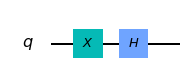

In [2]:
qc1 = QuantumCircuit(1)
qc1.x(0)
qc1.h(0)
qc1.draw('mpl')

We can easily find the output state by using the `quantum_info` module:

In [3]:
state1 = qi.Statevector.from_instruction(qc1)
array_to_latex(state1.data) # If array_to_latex not installed, comment out and use print() command below
#print(state1.data)

<IPython.core.display.Math object>

### Answer for Q1.1:

**3)** $\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}$

---
## Question 1.2

**What is the result of the measurements in the following circuit assuming error-free quantum computation?**

<img src="..\questions\circuits_images\bell.png" align="left" width="400"/>

**1)** 50% 0 and 50% 1

**2)** 50% 00 and 50% 11

**3)** 100% 1

**4)** Both 1 & 2 are possible

**5)** None of the above

### Solution to Q1.2:

Since in Qiskit, registers `q0` and `q1` are initialized at $|0 \rangle$, the circuit above generates the following Bell state before the measurements are performed:

$$ \frac{1}{\sqrt{2}} | 00 \rangle + \frac{1}{\sqrt{2}} | 11 \rangle $$

This means that, upon measurement, we will get the bitstring `00` with probability $\frac{1}{2}$ and the bitstring `11` with probability $\frac{1}{2}$.

We can, once again, confirm this in Qiskit. Let's generate the circuit:

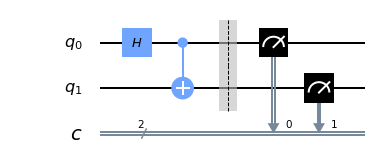

In [4]:
qc2 = QuantumCircuit(2,2)
qc2.h(0)
qc2.cx(0,1)
qc2.barrier()
qc2.measure([0,1],[0,1])
qc2.draw('mpl')

Now let's execute the simulation using the `qasm_simulator` for a large number of shots so we get a probability distribution that is close to the expected values:

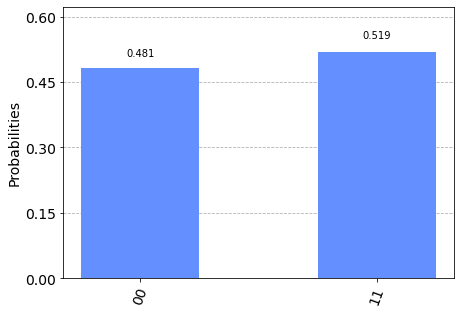

In [5]:
result2 = execute(qc2, backend = M_simulator, shots = 2048).result()
counts2 = result2.get_counts()
plot_histogram(counts2)

### Answer for Q1.2: 

**2)** 50% 00 and 50% 11

---
## Question 1.3

**Consider the three-qubit quantum circuit below. What are the real and imaginary components of the state vector?**

<img src="..\questions\circuits_images\q1.png" align="left" width="300"/>

**1)** <img src="..\questions\circuits_images\q1_a1.png" width = "800"/>

**2)** <img src="..\questions\circuits_images\q1_a2.png" width = "800"/>

**3)** <img src="..\questions\circuits_images\q1_a3.png" width = "800"/>

**4)** <img src="..\questions\circuits_images\q1_a4.png" width = "800"/>

**5)** None of the above


### Solution to Q1.3:

The easiest way to start analyzing this circuit is to recognize that the Hadamard gates acting on `q0` and `q1` will put these qubits in an equal superposition of all possible states, whereas `q2` will remain in the $|0 \rangle$ state:

$$
\begin{align}
| q_2 q_1 q_0 \rangle & = | q_2 \rangle \otimes | q_1 q_0 \rangle 
\\
& = | 0 \rangle \otimes |00 \rangle \enspace \xrightarrow[]{\enspace H^{\otimes 2} \enspace} \enspace | 0 \rangle \otimes \left ( \frac{1}{2} ( |00 \rangle + | 01 \rangle + | 10 \rangle + | 11 \rangle ) \right) = \frac{1}{2} ( |000 \rangle + | 001 \rangle + | 010 \rangle + | 011 \rangle )
\end{align}
$$

Next, we can see that the CNOT gate between `q0` and `q1` has not effect on our state because it simply swaps state $| 001 \rangle$ for state $| 011 \rangle$, and state $| 011 \rangle$ to $| 001 \rangle$, leaving the overall state unchanged.

Lastly, the CNOT gate between `q0` and `q2` will flip the state of `q2` whenever `q0` = $ 1 $: 

$$
\frac{1}{2} ( |0 \ 0 \ 0 \rangle + | 0 \ 0 \underset{\substack{\uparrow}}{1} \rangle + | 0 \ 1 \ 0 \rangle + | 0 \ 1\underset{\substack{\uparrow}}{1} \rangle ) \enspace \xrightarrow[]{ CNOT_{q0 \text{ , } q2}} \enspace \frac{1}{2} ( |0 \ 0 \ 0 \rangle + | \underset{\substack{\uparrow}}{1} \ 0 \ 1 \rangle + | 0 \ 1 \ 0 \rangle + | \underset{\substack{\uparrow}}{1} \ 1 \ 1 \rangle ) $$

This means we need to select the plot that has probability values different than zero for states $|000 \rangle, | 010 \rangle, | 101 \rangle, | 111 \rangle $

We can verify this in Qiskit too by generating the statevector for this circuit, and plotting the results using the `plot_state_city` visualization. Let's construct this circuit:

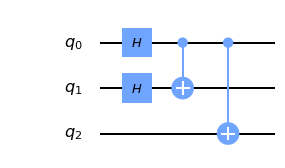

In [6]:
qc3 = QuantumCircuit(3)
qc3.h([0,1])
qc3.cx([0,0],[1,2])
qc3.draw('mpl')

Now let's generate the Cityscape plot for the circuit:

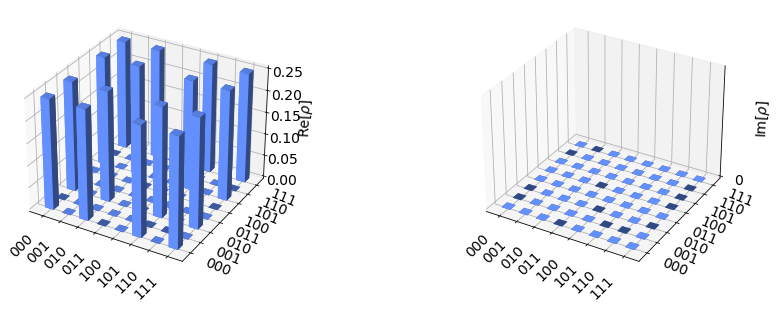

In [7]:
state3 = qi.DensityMatrix.from_instruction(qc3)
plot_state_city(state3.data)

### Answer for Q1.3: 

**1) Option** 1 of the list of possible answers matches the Cityscape plot above

---
## Question 1.4

Which of the following state visualization represent the same quantum state as shown in this qsphere?

<img src="..\questions\circuits_images\qsphere.png" align="left" width="500"/>

**1)** <img src="..\questions\circuits_images\statecity.png"/>

**2)** <img src="..\questions\circuits_images\hinton.png"/>

**3)** <img src="..\questions\circuits_images\paulivec.png"/>

**4)** <img src="..\questions\circuits_images\bloch_sphere.png"/>

**5)** None of the above

### Solution to Q1.4:

The qsphere above represents the Bell state $\frac{|00 \rangle - |11 \rangle}{\sqrt{2}}$, which can be generated using the following circuit:

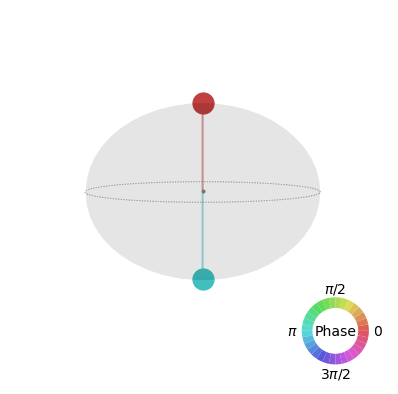

In [8]:
qc4 = QuantumCircuit(2,2)
qc4.x(0)
qc4.h(0)
qc4.cx(0,1)
state4 = qi.Statevector.from_instruction(qc4)
plot_state_qsphere(state4.data)

We can now generate the four types of state visualizations given as options, and see which one matches our state:

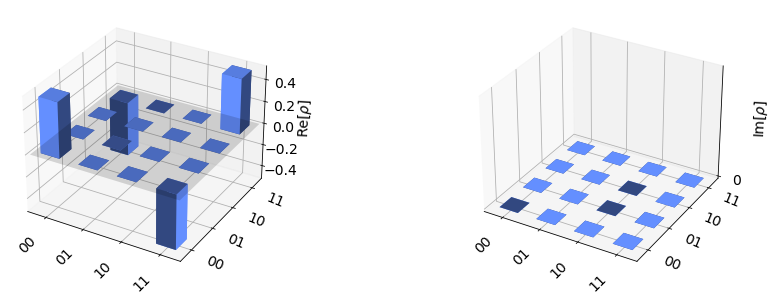

In [9]:
plot_state_city(state4.data)

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

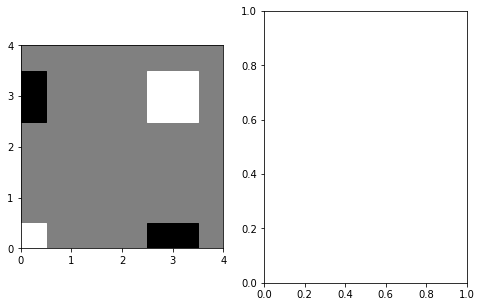

In [12]:
plot_state_hinton(state4.data)

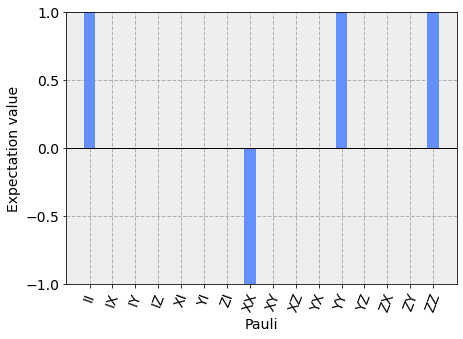

In [13]:
plot_state_paulivec(state4.data)

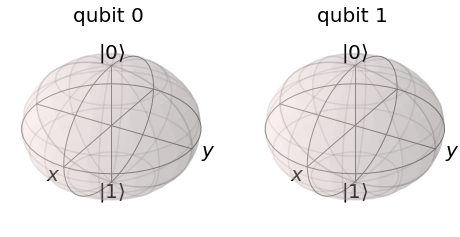

In [14]:
plot_bloch_multivector(state4.data)

### Answer for Q1.4: 

**2)** The Hinton plot above matches option 2 in the list of possible answers

---
## Question 1.5

Which one of the following gates is different from the rest?

**1)** U1Gate(pi)

**2)** U2Gate(0, pi)

**3)** U3Gate(pi/2, 0, pi)

**4)** HGate()

**5)** None of the above

### Solution to Q1.5:

It from looking at the options, it is obvious that **option 1** is different because it corresponds to a ZGate, whereas all others correspond to different ways of implementing an HGate. However, we can check how these behave by applying them to the $|0 \rangle$ state, and verify if there are any differences:

In [15]:
qc5_1 = QuantumCircuit(1)
qc5_1.u1(np.pi,0)
state5_1 = qi.Operator(qc5_1)
array_to_latex(state5_1.data) # If array_to_latex not installed, comment out and use print() command below
#print(state5_1.data)

<IPython.core.display.Math object>

In [16]:
qc5_2 = QuantumCircuit(1)
qc5_2.u2(0,np.pi,0)
state5_2 = qi.Operator(qc5_2)
array_to_latex(state5_2.data) # If array_to_latex not installed, comment out and use print() command below
#print(state5_2.data)

<IPython.core.display.Math object>

In [17]:
qc5_3 = QuantumCircuit(1)
qc5_3.u3(np.pi/2,0,np.pi,0)
state5_3 = qi.Operator(qc5_3)
array_to_latex(state5_3.data) # If array_to_latex not installed, comment out and use print() command below
#print(state5_3.data)

<IPython.core.display.Math object>

In [18]:
qc5_4 = QuantumCircuit(1)
qc5_4.h(0)
state5_4 = qi.Operator(qc5_4)
array_to_latex(state5_4.data) # If array_to_latex not installed, comment out and use print() command below
#print(state5_4.data)

<IPython.core.display.Math object>

### Answer for Q1.5: 

**1)** U1Gate(pi)

In [ ]:
import qiskit
qiskit.__qiskit_version__